In [23]:
## Init ##
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from rdkit import Chem
import sys

sys.path.insert(1, '/chespa/')
import chespa.data_analysis as danal

fname = os.path.join(os.getcwd(), r'data/SupportingData.xlsx')
savepath = os.path.join(os.getcwd(), 'images')
avgs_path = os.path.join(os.getcwd(), 'data/pca/avgs.npy')

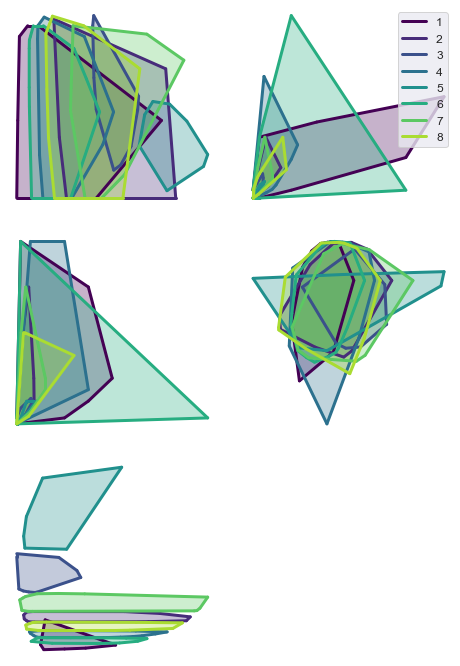

In [24]:
## Plot ChemSpace clusters, variables ##
cs_data_pca = pd.read_excel(fname, sheet_name='ChemSpace')
cols = ['Mass', 'N/C', 'N/H', 'O/C', 'O/H', 'logP', 'pKa (most acidic)',
        'Balaban Index', 'Harary Index', 'Ring Bond %']
data_vars = cs_data_pca[cols].values

# Where nans present, replace with avg. (same as done pre-PCA)
avgs = np.load(avgs_path)
for i in range(data_vars.shape[1]):
    data_vars[np.isnan(data_vars[:, i]), i] = avgs[i]

# For better var pairing in figure
reorder = [0, 9, 1, 2, 3, 4, 5, 6, 7, 8]
data_vars = data_vars[:, reorder]
cols = [cols[i] for i in reorder]

filename = os.path.join(savepath, 'ChemSpace_Vars')
danal.plot_vars(data_vars, cols, cs_data_pca['ChemSpace'].tolist(),
                filename=filename)

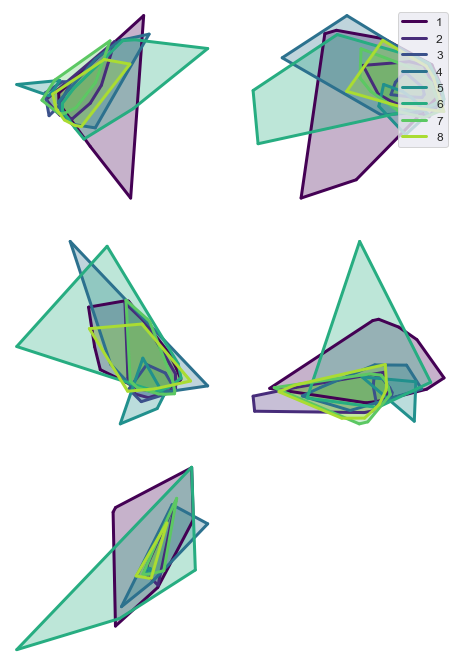

In [25]:
## Plot ChemSpace clusters, PCs ##
pca_cols = ['PC%i' % (i + 1) for i in range(len(cols))]
filename = os.path.join(savepath, 'ChemSpace_PCA')
danal.plot_vars(cs_data_pca[pca_cols].values, pca_cols,
                cs_data_pca['ChemSpace'].tolist(), filename=filename)

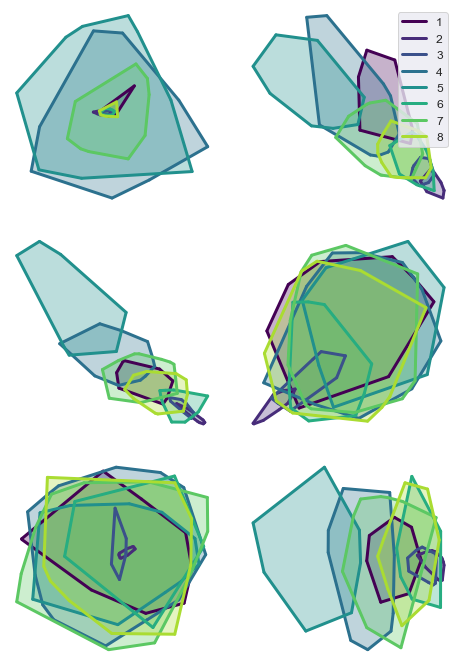

In [26]:
## Plot DarkChem clusters ##
dc_data = pd.read_excel(fname, sheet_name='DarkChem')
ls_cols = ['LS%i' % (i + 1) for i in range(12)]
filename = os.path.join(savepath, 'DarkChem_LS')
danal.plot_vars(dc_data[ls_cols].values, ls_cols,
                dc_data['DarkChem'].tolist(), filename=filename)

In [27]:
## Data prep for ionization results ##

# Create dfs for each condition (spiked in, observed, not observed)
obs, not_obs, spiked = danal.get_spiked_results(fname)

# Create dfs with chemspace properties
labels = danal.get_cpd_labels(fname)
cols = ['CpdInd', 'Mass', 'N/C', 'N/H', 'O/C', 'O/H', 'logP', 'pKa (most acidic)',
        'Balaban Index', 'Harary Index', 'Ring Bond %']
cs_data = pd.read_excel(fname, sheet_name='ChemSpace', usecols=cols)
cs_data_obs = obs.join(cs_data.set_index('CpdInd'), on='CpdInd')
cs_data_notobs = not_obs.join(cs_data.set_index('CpdInd'), on='CpdInd')
cs_data_spiked = spiked.join(cs_data.set_index('CpdInd'), on='CpdInd')

# Unique labels
uniq_labels_cf = labels['ClassyFire'].unique()
uniq_labels_cs = labels['ChemSpace'].unique()
uniq_labels_dc = labels['DarkChem'].unique()
uniq_labels_ms = labels['MACCS'].unique()
uniq_labels_ss = labels['SPECTRe'].unique()

# Get counts
cf_spiked = danal.get_counts(spiked, labels, 'ClassyFire', uniq_labels_cf)
cs_spiked = danal.get_counts(spiked, labels, 'ChemSpace', uniq_labels_cs)
dc_spiked = danal.get_counts(spiked, labels, 'DarkChem', uniq_labels_dc)
ms_spiked = danal.get_counts(spiked, labels, 'MACCS', uniq_labels_ms)
ss_spiked = danal.get_counts(spiked, labels, 'SPECTRe', uniq_labels_ss)

cf_obs = danal.get_counts(obs, labels, 'ClassyFire', uniq_labels_cf)
cs_obs = danal.get_counts(obs, labels, 'ChemSpace', uniq_labels_cs)
dc_obs = danal.get_counts(obs, labels, 'DarkChem', uniq_labels_dc)
ms_obs = danal.get_counts(obs, labels, 'MACCS', uniq_labels_ms)
ss_obs = danal.get_counts(obs, labels, 'SPECTRe', uniq_labels_ss)

cf_notobs = danal.get_counts(not_obs, labels, 'ClassyFire', uniq_labels_cf)
cs_notobs = danal.get_counts(not_obs, labels, 'ChemSpace', uniq_labels_cs)
dc_notobs = danal.get_counts(not_obs, labels, 'DarkChem', uniq_labels_dc)
ms_notobs = danal.get_counts(not_obs, labels, 'MACCS', uniq_labels_ms)
ss_notobs = danal.get_counts(not_obs, labels, 'SPECTRe', uniq_labels_ss)

cf_fulllib = danal.get_counts(cs_data, labels, 'ClassyFire', uniq_labels_cf)
cs_fulllib = danal.get_counts(cs_data, labels, 'ChemSpace', uniq_labels_cs)
dc_fulllib = danal.get_counts(cs_data, labels, 'DarkChem', uniq_labels_dc)
ms_fulllib = danal.get_counts(cs_data, labels, 'MACCS', uniq_labels_ms)
ss_fulllib = danal.get_counts(cs_data, labels, 'SPECTRe', uniq_labels_ss)

# Get totals by method
cf_obs_method = danal.get_method_counts(obs, labels, 'ClassyFire', uniq_labels_cf)
cs_obs_method = danal.get_method_counts(obs, labels, 'ChemSpace', uniq_labels_cs)
dc_obs_method = danal.get_method_counts(obs, labels, 'DarkChem', uniq_labels_dc)
ms_obs_method = danal.get_method_counts(obs, labels, 'MACCS', uniq_labels_ms)
ss_obs_method = danal.get_method_counts(obs, labels, 'SPECTRe', uniq_labels_ss)

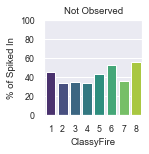

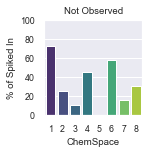

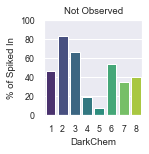

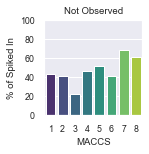

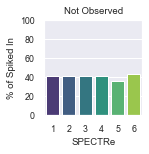

In [28]:
## Not observed compounds for each group/cluster, out of all spiked in compounds ##
datasets = [cf_notobs / cf_spiked, cs_notobs / cs_spiked, dc_notobs / dc_spiked,
            ms_notobs / ms_spiked, ss_notobs / ss_spiked]
names = ['cf', 'cs', 'dc', 'ms', 'ss']
for data, name in zip(datasets, names):
    filename = os.path.join(savepath, 'barplots/barplot_notobs_%s' % name)
    danal.plot_bar_percent(data * 100, '% of Spiked In', title='Not Observed',
                           filename=filename)

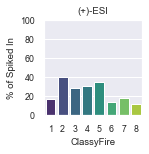

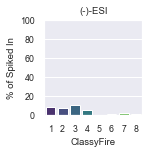

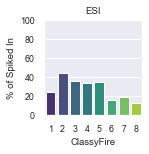

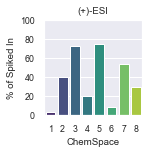

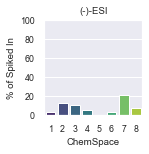

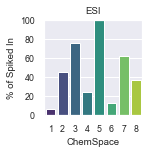

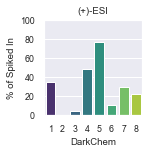

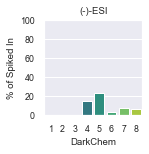

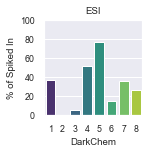

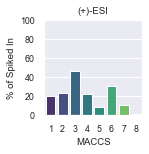

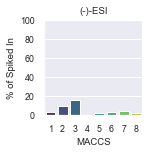

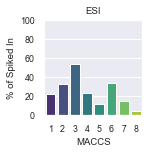

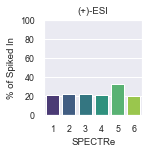

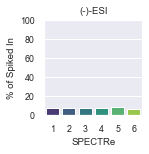

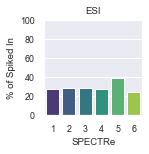

In [29]:
## Observed compounds for each group/cluster, sorted by method, out of all spiked in compounds ##
datasets = [cf_obs_method, cs_obs_method, dc_obs_method, ms_obs_method, ss_obs_method]

totals = [cf_spiked, cs_spiked, dc_spiked, ms_spiked, ss_spiked]
ylabel = '% of Spiked In'
names = ['cf', 'cs', 'dc', 'ms', 'ss']
filename = os.path.join(savepath, 'barplots/barplot_%s_%s')
danal.plot_bars_percent_method(datasets, totals, ylabel, names,
                               filename=filename)

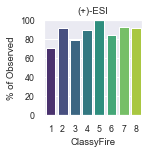

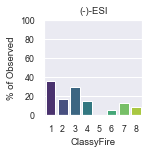

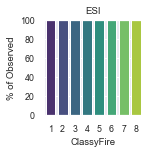

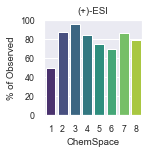

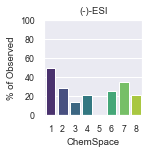

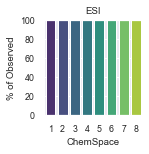

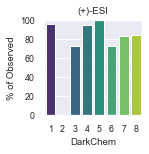

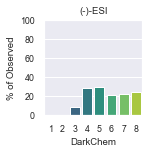

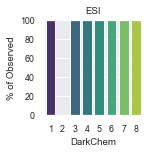

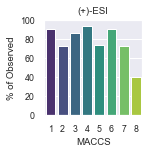

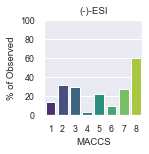

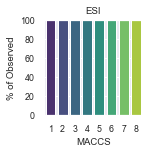

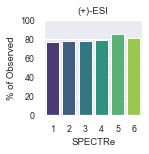

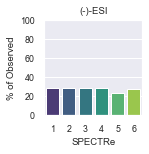

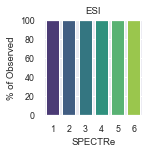

In [30]:
## Observed compounds for each group/cluster, sorted by method, out of all observed compounds ##
totals = [cf_obs, cs_obs, dc_obs, ms_obs, ss_obs]; ylabel = '% of Observed'
names = ['cf_percent', 'cs_percent', 'dc_percent', 'ms_percent', 'ss_percent']
filename = os.path.join(savepath, 'barplots/barplot_%s_%s')
danal.plot_bars_percent_method(datasets, totals, ylabel, names,
                               filename=filename)

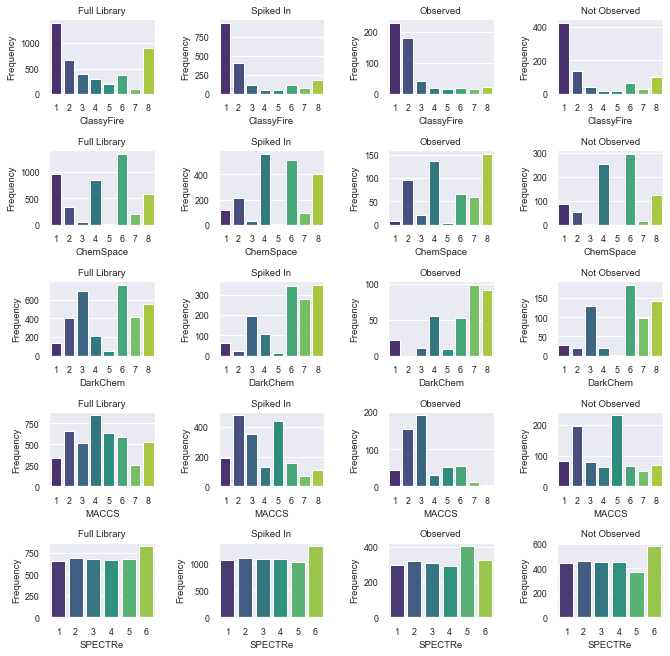

In [31]:
## Counts for number of members in each group/cluster ##
datasets = [cf_fulllib, cs_fulllib, dc_fulllib, ms_fulllib, ss_fulllib,
            cf_spiked, cs_spiked, dc_spiked, ms_spiked, ss_spiked,
            cf_obs, cs_obs, dc_obs, ms_obs, ss_obs,
            cf_notobs, cs_notobs, dc_notobs, ms_notobs, ss_notobs]
datasets = [cf_fulllib, cf_spiked, cf_obs, cf_notobs,
            cs_fulllib, cs_spiked, cs_obs, cs_notobs,
            dc_fulllib, dc_spiked, dc_obs, dc_notobs,
            ms_fulllib, ms_spiked, ms_obs, ms_notobs,
            ss_fulllib, ss_spiked, ss_obs, ss_notobs]
titles = ['Full Library', 'Spiked In', 'Observed', 'Not Observed',
          'Full Library', 'Spiked In', 'Observed', 'Not Observed',
          'Full Library', 'Spiked In', 'Observed', 'Not Observed',
          'Full Library', 'Spiked In', 'Observed', 'Not Observed',
          'Full Library', 'Spiked In', 'Observed', 'Not Observed']
filename = os.path.join(savepath, 'barplot_counts')
danal.plot_bar_counts_multi(datasets, 'Frequency', titles, ymax=None, hspace=0.75,
                            filename=filename)

ClassyFire


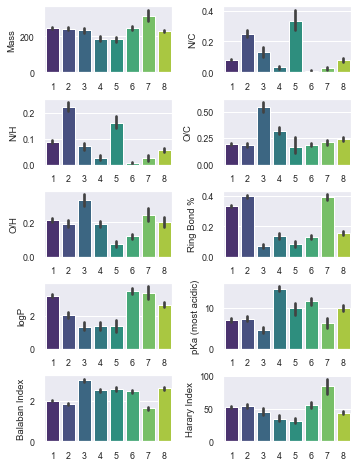

ChemSpace


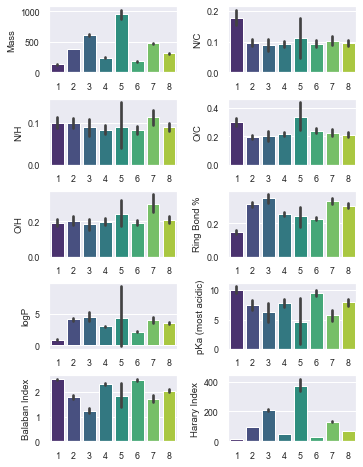

DarkChem


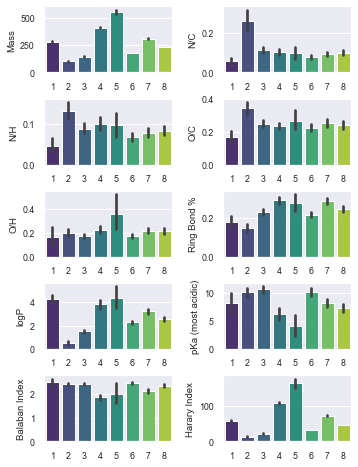

MACCS


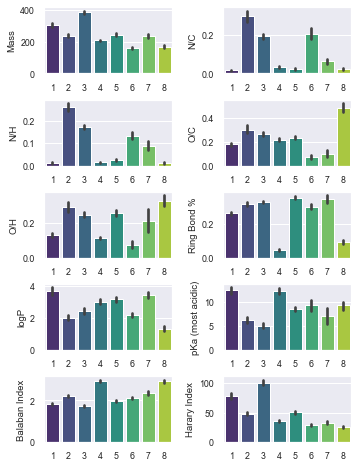

SPECTRe


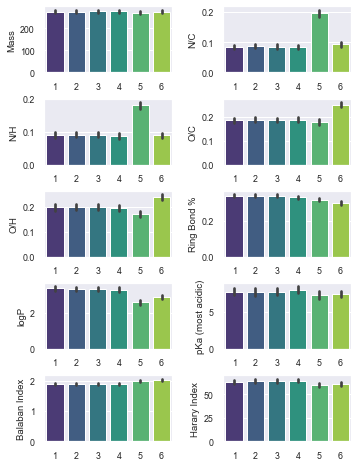

In [32]:
## Properties for spiked in/observed/not observed, by group.cluster ##
title = 'FullLibrary'
data = cs_data

for label in list(labels)[1:]:
    print(label)
    cols = ['CpdInd', label]
    temp_labels = labels.copy()[cols]
    temp_labels.drop_duplicates(subset=cols, inplace=True)
    df = data.merge(temp_labels.set_index('CpdInd'), on='CpdInd')
    df.sort_values(label, inplace=True)
    filename = os.path.join(savepath, 'properties_%s_%s' % (label, title))
    danal.plot_bar_averages_multi(label, list(cs_data)[1:], df, filename=filename)

ClassyFire


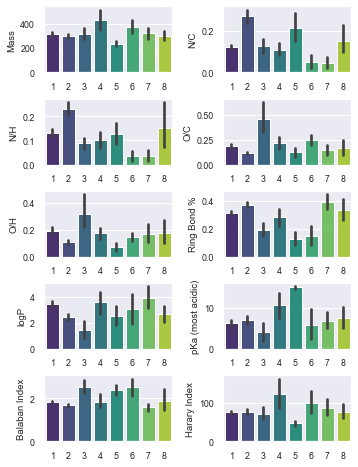

ChemSpace


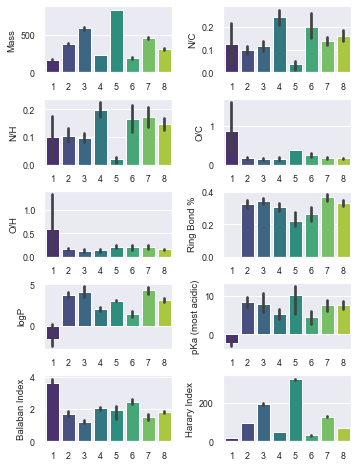

DarkChem


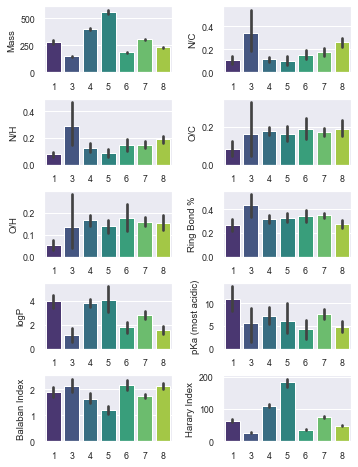

MACCS


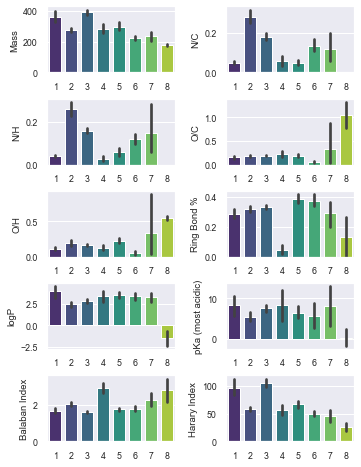

SPECTRe


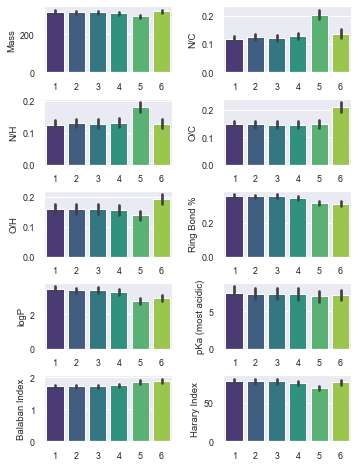

In [33]:
title = 'Observed'
data = cs_data_obs

for label in list(labels)[1:]:
    print(label)
    cols = ['CpdInd', label]
    temp_labels = labels.copy()[cols]
    temp_labels.drop_duplicates(subset=cols, inplace=True)
    df = data.merge(temp_labels.set_index('CpdInd'), on='CpdInd')
    df.sort_values(label, inplace=True)
    filename = os.path.join(savepath, 'properties_%s_%s' % (label, title))
    danal.plot_bar_averages_multi(label, list(cs_data)[1:], df, filename=filename)

ClassyFire


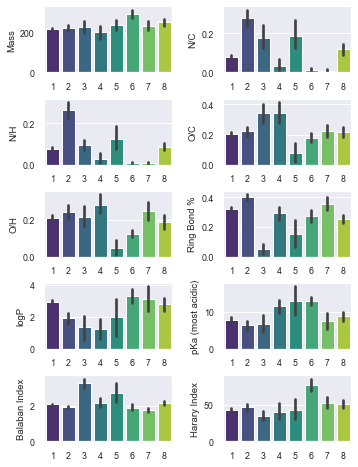

ChemSpace


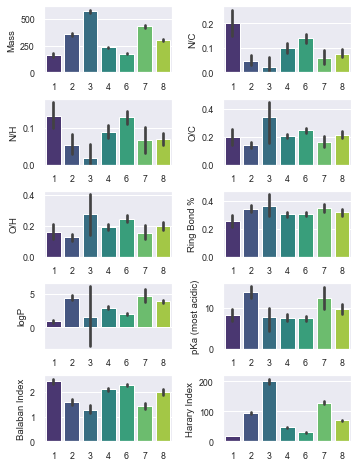

DarkChem


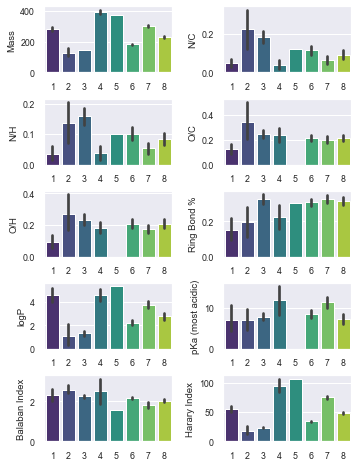

MACCS


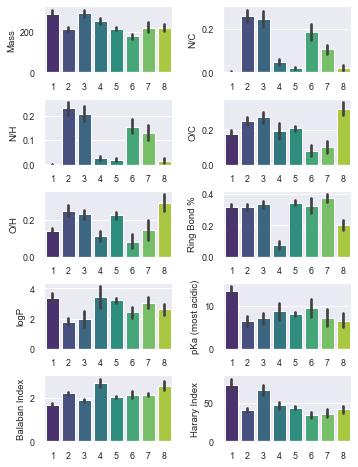

SPECTRe


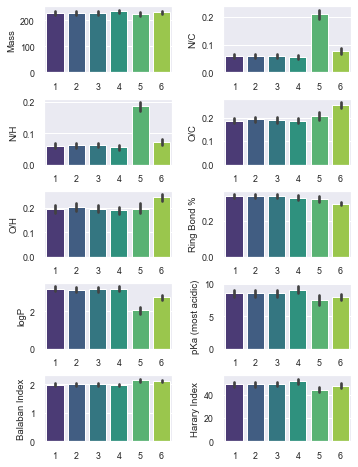

In [34]:
title = 'NotObserved'
data = cs_data_notobs

for label in list(labels)[1:]:
    print(label)
    cols = ['CpdInd', label]
    temp_labels = labels.copy()[cols]
    temp_labels.drop_duplicates(subset=cols, inplace=True)
    df = data.merge(temp_labels.set_index('CpdInd'), on='CpdInd')
    df.sort_values(label, inplace=True)
    filename = os.path.join(savepath, 'properties_%s_%s' % (label, title))
    danal.plot_bar_averages_multi(label, list(cs_data)[1:], df, filename=filename)

ClassyFire


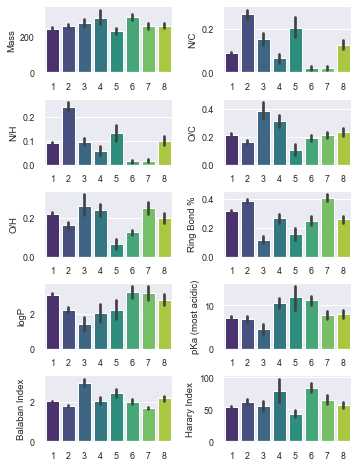

ChemSpace


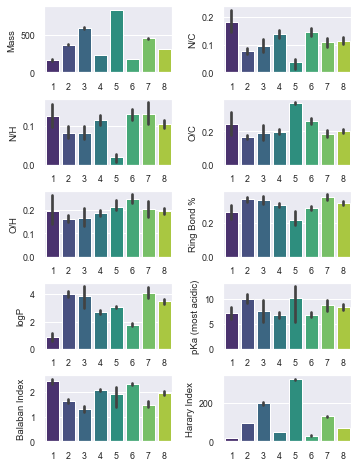

DarkChem


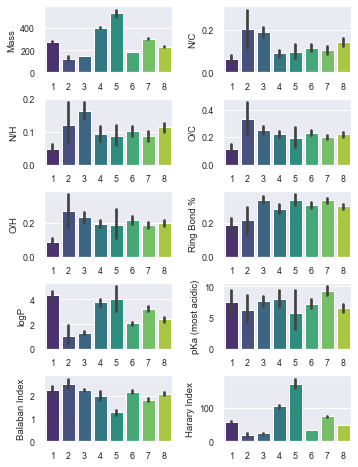

MACCS


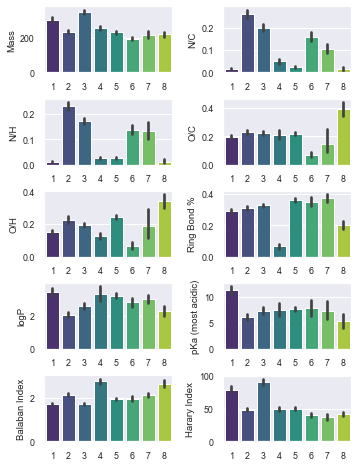

SPECTRe


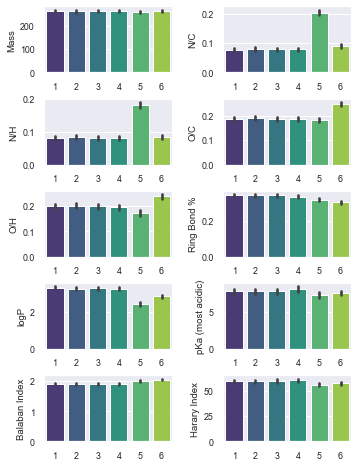

In [35]:
## Properties for spiked in compounds ##
title = 'SpikedIn'
data = cs_data_spiked

for label in list(labels)[1:]:
    print(label)
    cols = ['CpdInd', label]
    temp_labels = labels.copy()[cols]
    temp_labels.drop_duplicates(subset=cols, inplace=True)
    df = data.merge(temp_labels.set_index('CpdInd'), on='CpdInd')
    df.sort_values(label, inplace=True)
    filename = os.path.join(savepath, 'properties_%s_%s' % (label, title))
    danal.plot_bar_averages_multi(label, list(cs_data)[1:], df, filename=filename)

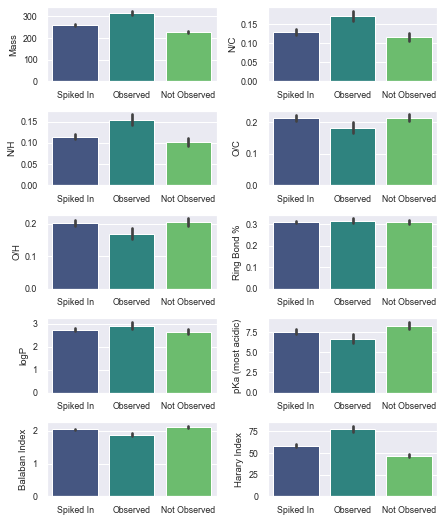

In [36]:
## Properties for spiked in/observed/not observed in general ##
label = 'Result'
cs_data_spiked[label] = 'SpikedIn'
cs_data_obs[label] = 'Observed'
cs_data_notobs[label] = 'NotObserved'
cols = ['CpdInd', 'Mass', 'N/C', 'N/H', 'O/C', 'O/H', 'logP', 'pKa (most acidic)',
        'Balaban Index', 'Harary Index', 'Ring Bond %', label]
cs_data_combo = pd.concat([cs_data_spiked[cols], cs_data_obs[cols],
                           cs_data_notobs[cols]], sort=False)
del cs_data_spiked[label], cs_data_obs[label], cs_data_notobs[label]

filename = os.path.join(savepath, 'properties_%s' % (label))
danal.plot_bar_averages_multi(label, list(cs_data)[1:], cs_data_combo,
                              fig_width=7, fig_height=9, wspace=0.3,
                              filename=filename)

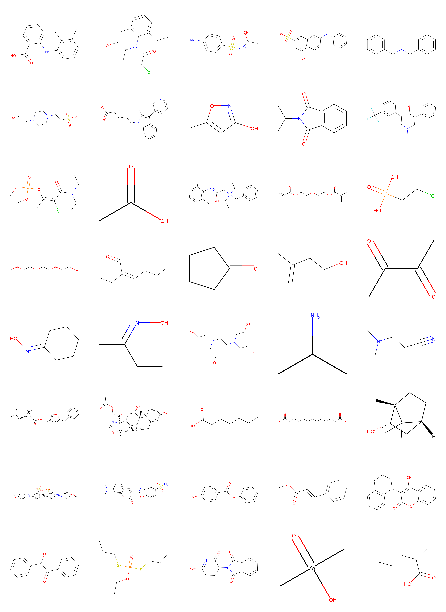

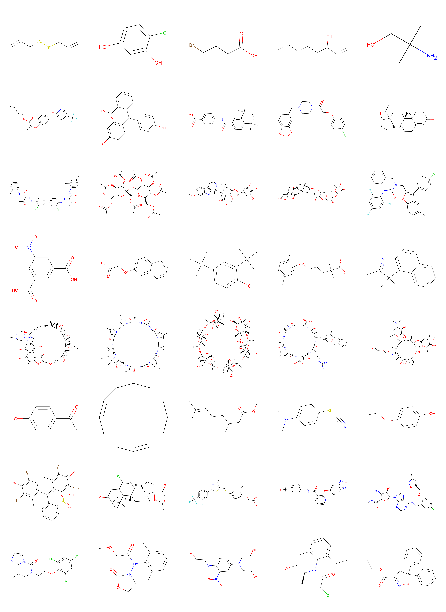

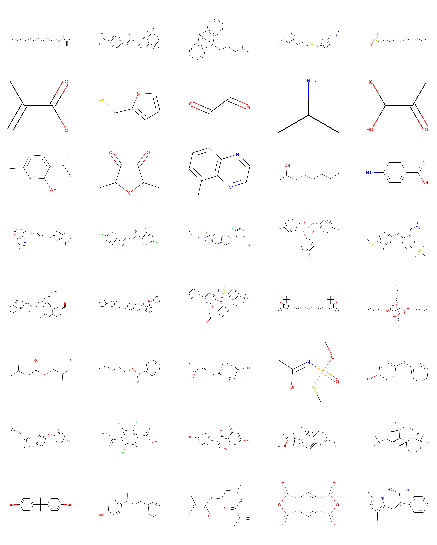

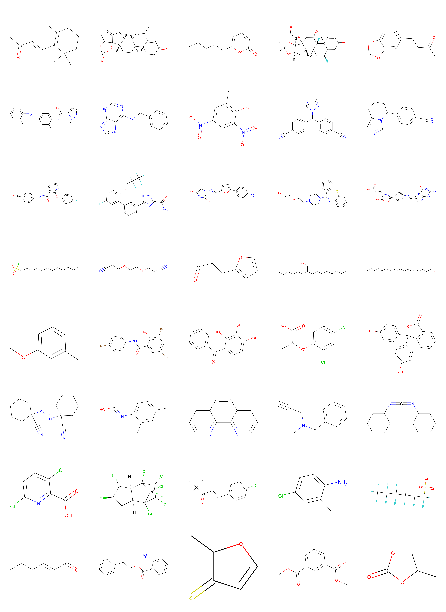

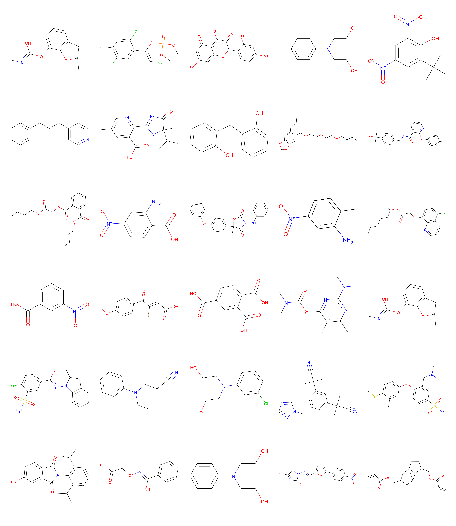

In [37]:
## Draw cluster representatives ##
n = 5  # Num representatives per group

cols = ['CpdInd', 'Uncharged, Desalted, Major Tautomer SMILES']
data_temp = pd.read_excel(fname,
                          sheet_name='SuspectLibrary', usecols=cols, header=0)
data = labels.join(data_temp.set_index('CpdInd'), on='CpdInd')

# Convert SMILES to RDKit Mols object
data['Mols'] = [Chem.MolFromSmiles(smi) for smi in data[cols[1]]]
data = data[~pd.isnull(data['Mols'])]  # Some fail in RDKit

for label in list(labels)[1:]:
    filename = os.path.join(savepath, 'chemdraw_%s.png' % (label))
    danal.draw_cpds(data, label, n=n, filename=filename)
